<h1><center><font size=10>Water Quality Prediction</center></font></h1>

### What to expect in this notebook

*  Introduction
*  Objectives
*  Essential Libraries
*  Exploratory Data Analysis
*  Data Preprocessing
*  Train Test Split
*  Logistic Regression
*  Decision Tree Classifier
*  Support Vector Machines (SVM)
*  Random Forest Classifier
*  Naive Bayes Classifier
*  Model tuning using GridSearch
*  Model Evaluation
*  Model deployment

# **Introduction**

In the realm of environmental science, ensuring safe and clean drinking water remains a paramount concern. The advent of machine learning has opened new avenues for advancing our understanding and capabilities in monitoring and predicting water quality. This project embarks on the critical task of water potability analysis, employing machine learning algorithms to discern the safety of water samples for human consumption.

Leveraging a comprehensive dataset from Kaggle, which encapsulates various factors influencing water potability, this study aims to meticulously analyze these attributes to understand their collective impact on water quality. Each feature within this dataset represents a crucial aspect affecting water's suitability for consumption, necessitating a thorough examination.

Through this research, I endeavor to develop and train a robust machine learning model capable of accurately classifying water samples as either safe or unsafe for drinking. This initiative not only contributes to the scientific community's ongoing efforts in water quality research but also holds the potential to significantly impact public health and environmental safety.

## **Objective:**


The objective of this project is to leverage machine learning algorithms to analyze and predict water quality based on various contributing factors, utilizing a comprehensive dataset from Kaggle. Specifically, the project aims to understand the key elements affecting water potability and develop a predictive model that can accurately classify water samples as safe or unsafe for human consumption.

In [ ]:
# Mounting the drive in google colab (should be commented out when working on a local machine)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing essential libraries & the dataset:**

---



In [ ]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# To help with model building
#from sklearn.linear_model import LogisticRegression

# To build classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# For tuning the model
from sklearn.model_selection import GridSearchCV

In [ ]:
# installing the library for deploying ML models
#!pip install gradio
!pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
# Importing the data set in google colab
df = pd.read_csv('/content/drive/MyDrive/Copilot/water_potability.csv')

In [ ]:
# Creating a copy of the dataset
data = df.copy()

### **View the first and last 5 rows of the dataset**

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89046,20791.31898,7.30021,368.51644,564.30865,10.37978,86.99097,2.96314,0
1,3.71608,129.42292,18630.05786,6.63525,NaN,592.88536,15.18001,56.32908,4.50066,0
2,8.09912,224.23626,19909.54173,9.27588,NaN,418.60621,16.86864,66.42009,3.05593,0
3,8.31677,214.37339,22018.41744,8.05933,356.88614,363.26652,18.43652,100.34167,4.62877,0
4,9.09222,181.10151,17978.98634,6.54660,310.13574,398.41081,11.55828,31.99799,4.07508,0


In [ ]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.66810,193.68174,47580.99160,7.16664,359.94857,526.42417,13.89442,66.68769,4.43582,1
3272,7.80886,193.55321,17329.80216,8.06136,NaN,392.44958,19.90323,NaN,2.79824,1
3273,9.41951,175.76265,33155.57822,7.35023,NaN,432.04478,11.03907,69.84540,3.29888,1
3274,5.12676,230.60376,11983.86938,6.30336,NaN,402.88311,11.16895,77.48821,4.70866,1
3275,7.87467,195.10230,17404.17706,7.50931,NaN,327.45976,16.14037,78.69845,2.30915,1


### **Understanding the shape of the dataset**

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3276 rows and 10 columns.


### **Checking the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### **Checking for missing values in the dataset**

In [ ]:
# checking null values in the columns
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## **Observation:**


* The dataset under examination comprises 3,276 entries, all of which are numeric, presented in formats of floats and integers.
* Notably, certain key parameters such as pH, Sulfate, and Trihalomethanes exhibit missing values that necessitate appropriate treatment to ensure the integrity and usability of the data for our analysis and predictive modeling.

### **Checking for unique and duplicate values in the columns**

In [ ]:
# unique values in the columns
for i in data.columns:
    print(i, data[i].nunique())

ph 2785
Hardness 3276
Solids 3276
Chloramines 3276
Sulfate 2495
Conductivity 3276
Organic_carbon 3276
Trihalomethanes 3114
Turbidity 3276
Potability 2


In [ ]:
# check for duplicates
duplicates = data.duplicated()
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  0


In [ ]:
# Filling missing values in the dataframe with median
data.fillna(data.median(), inplace=True)

In [ ]:
# check for missing values
missing_values = data.isna().sum()
print("Number of missing values in the dataset = ", missing_values.sum())
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Number of missing values in the dataset =  0


ph                0.00000
Hardness          0.00000
Solids            0.00000
Chloramines       0.00000
Sulfate           0.00000
Conductivity      0.00000
Organic_carbon    0.00000
Trihalomethanes   0.00000
Turbidity         0.00000
Potability        0.00000
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## **Observation:**


All missing values have now been addressed by substituting them with the median, resulting in a dataset with no absent records. While alternative methods could be employed for handling missing data, the median was chosen for this specific task.

## **Exploratory Data Analysis (EDA)**

**Descriptive statistics for numeric columns**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.00000,7.07419,1.47004,0.00000,6.27767,7.03675,7.87005,14.00000
Hardness,3276.00000,196.36950,32.87976,47.43200,176.85054,196.96763,216.66746,323.12400
Solids,3276.00000,22014.09253,8768.57083,320.94261,15666.69030,20927.83361,27332.76213,61227.19601
Chloramines,3276.00000,7.12228,1.58308,0.35200,6.12742,7.13030,8.11489,13.12700
Sulfate,3276.00000,333.60836,36.14385,129.00000,317.09464,333.07355,350.38576,481.03064
Conductivity,3276.00000,426.20511,80.82406,181.48375,365.73441,421.88497,481.79230,753.34262
Organic_carbon,3276.00000,14.28497,3.30816,2.20000,12.06580,14.21834,16.55765,28.30000
Trihalomethanes,3276.00000,66.40748,15.76996,0.73800,56.64766,66.62249,76.66661,124.00000
Turbidity,3276.00000,3.96679,0.78038,1.45000,3.43971,3.95503,4.50032,6.73900
Potability,3276.00000,0.39011,0.48785,0.00000,0.00000,0.00000,1.00000,1.00000


## **Observation:**

* The minimum pH value recorded is zero, which is unrealistic for natural water samples.
* The average pH of the water samples is 7, indicating that the samples generally display a neutral pH level.

In [ ]:
# Selecting all rows with ph equall to 0 in a data frame
data[data['ph'] == 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.00000,214.84614,49456.58711,7.89754,333.07355,583.44885,7.70233,77.71289,4.92884,0


In [ ]:
# replacing ph equall to 0 with the median value
data['ph'] = data['ph'].replace(0, data['ph'].median())

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.00000,7.07634,1.46483,0.22750,6.27932,7.03675,7.87005,14.00000
Hardness,3276.00000,196.36950,32.87976,47.43200,176.85054,196.96763,216.66746,323.12400
Solids,3276.00000,22014.09253,8768.57083,320.94261,15666.69030,20927.83361,27332.76213,61227.19601
Chloramines,3276.00000,7.12228,1.58308,0.35200,6.12742,7.13030,8.11489,13.12700
Sulfate,3276.00000,333.60836,36.14385,129.00000,317.09464,333.07355,350.38576,481.03064
Conductivity,3276.00000,426.20511,80.82406,181.48375,365.73441,421.88497,481.79230,753.34262
Organic_carbon,3276.00000,14.28497,3.30816,2.20000,12.06580,14.21834,16.55765,28.30000
Trihalomethanes,3276.00000,66.40748,15.76996,0.73800,56.64766,66.62249,76.66661,124.00000
Turbidity,3276.00000,3.96679,0.78038,1.45000,3.43971,3.95503,4.50032,6.73900
Potability,3276.00000,0.39011,0.48785,0.00000,0.00000,0.00000,1.00000,1.00000


### **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale for the numerical variables

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, dpi=200):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

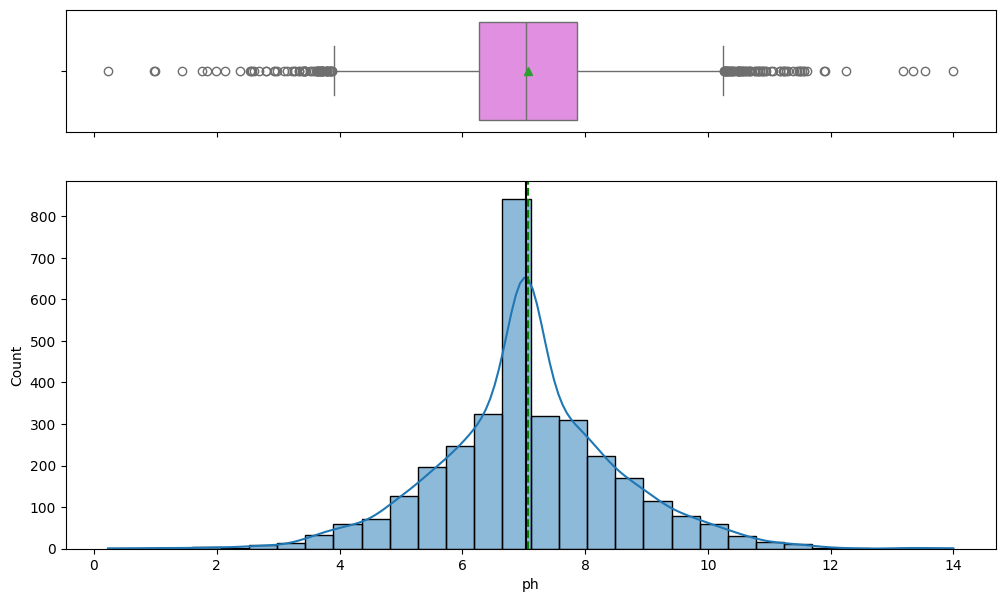

In [ ]:
histogram_boxplot(data, "ph", kde = True, bins = 30, dpi=300)

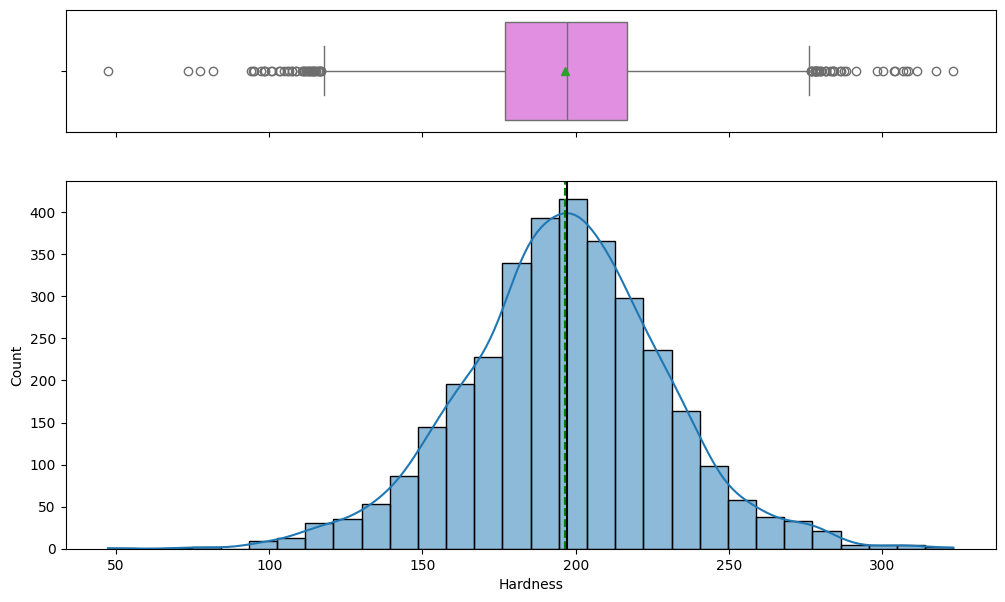

In [ ]:
histogram_boxplot(data, "Hardness", kde = True, bins = 30, dpi=300)

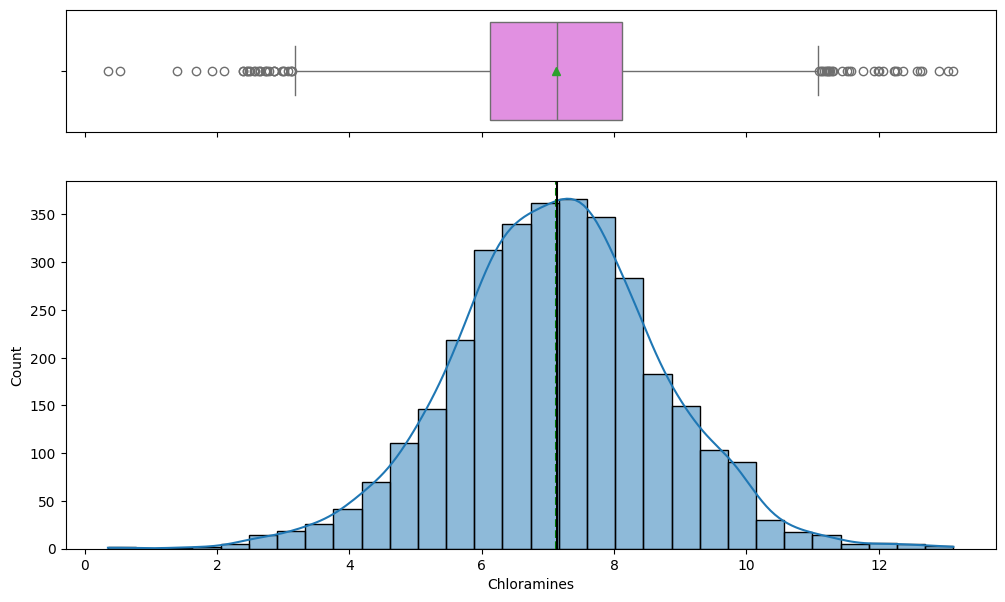

In [ ]:
histogram_boxplot(data, "Chloramines", kde = True, bins = 30, dpi=300)

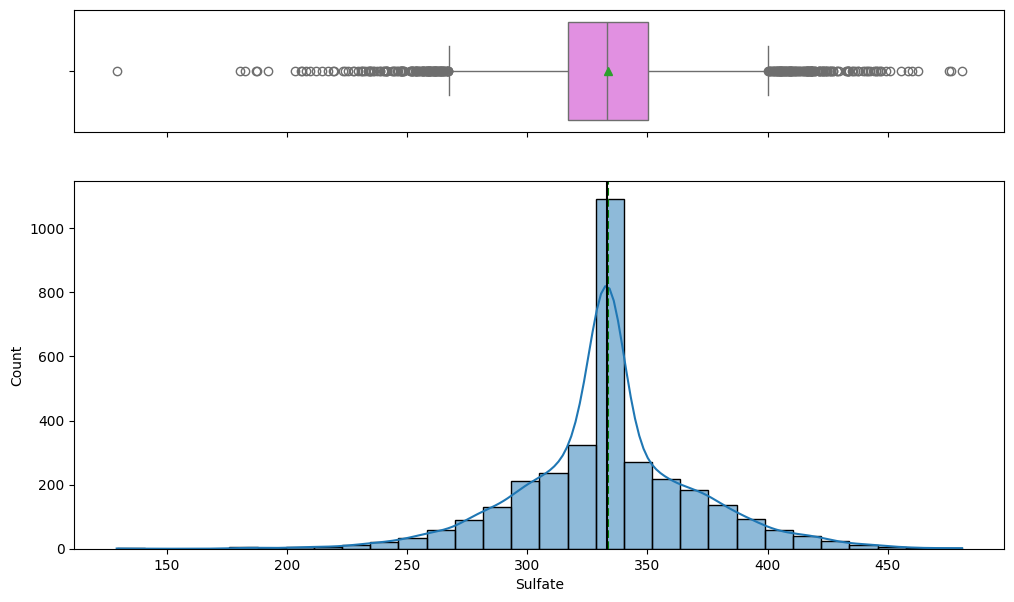

In [ ]:
histogram_boxplot(data, "Sulfate", kde = True, bins = 30, dpi=300)

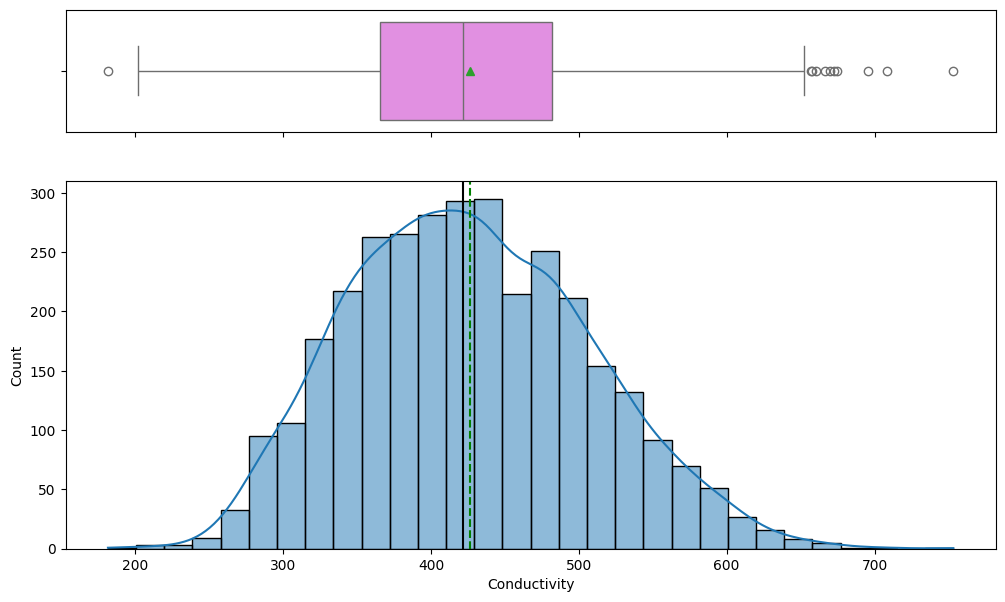

In [ ]:
histogram_boxplot(data, "Conductivity", kde = True, bins = 30, dpi=300)

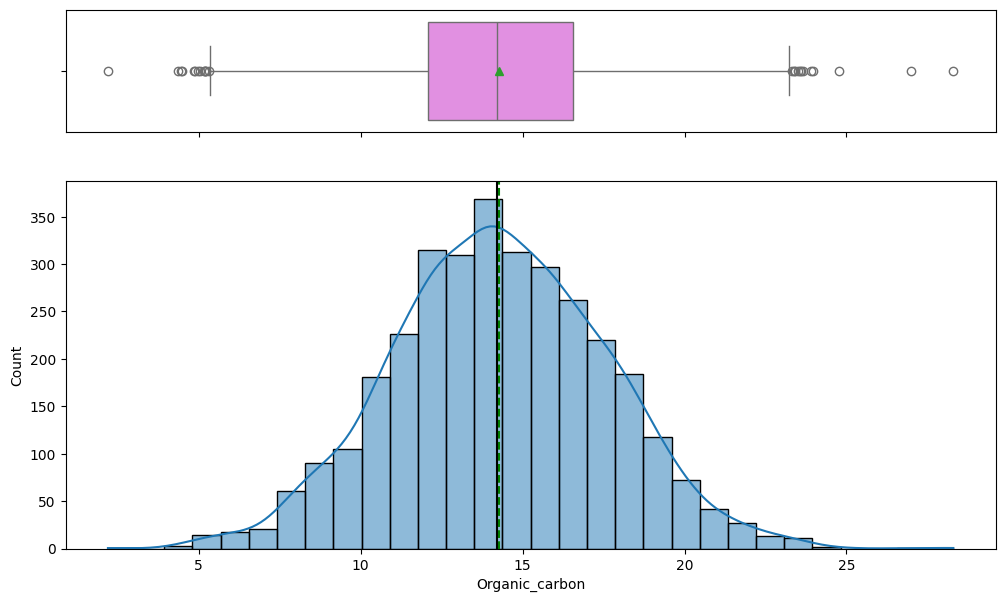

In [ ]:
histogram_boxplot(data, "Organic_carbon", kde = True, bins = 30, dpi=300)

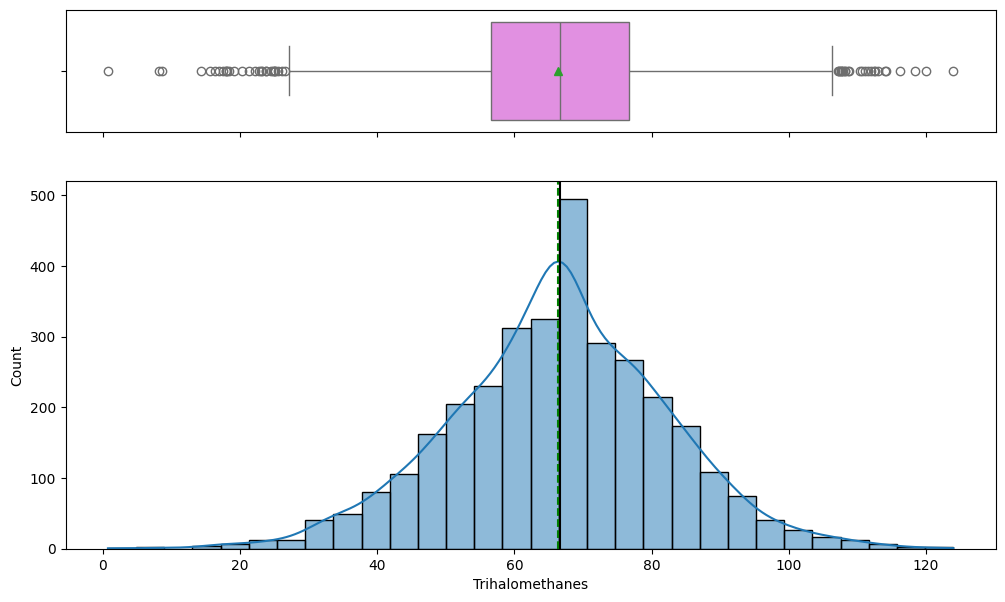

In [ ]:
histogram_boxplot(data, "Trihalomethanes", kde = True, bins = 30, dpi=300)

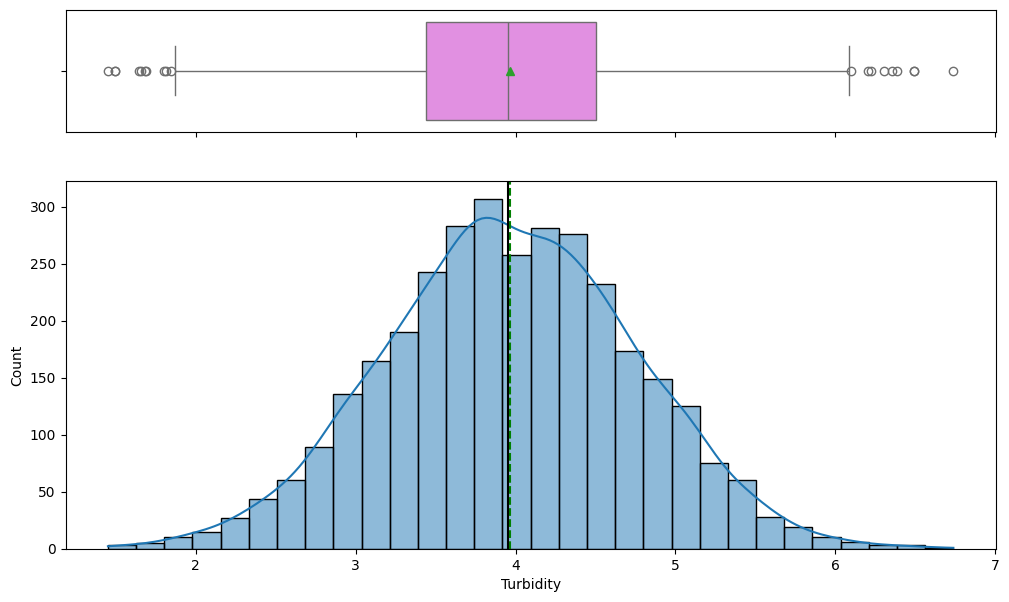

In [ ]:
histogram_boxplot(data, "Turbidity", kde = True, bins = 30, dpi=300)

## **Observation:**


The plots suggest that the dataset approximates a normal distribution. Nevertheless, this observation could be subjective, necessitating additional methods to confirm the dataset's normality. Below, I have utilized skewness and kurtosis to determine the normality of individual features within the dataset.

In [ ]:
# finding the skewness and kurtosis of the numerical columns and putting the result in a dataframe
skewness = pd.DataFrame(data.skew(), columns=['skewness'])
kurtosis = pd.DataFrame(data.kurtosis(), columns=['kurtosis'])
skewness_kurtosis = pd.concat([skewness, kurtosis], axis=1)
skewness_kurtosis

,skewness,kurtosis
ph,0.07172,1.27148
Hardness,-0.03934,0.61577
Solids,0.62163,0.44283
Chloramines,-0.01210,0.58990
Sulfate,-0.02728,1.78867
Conductivity,0.26449,-0.27709
Organic_carbon,0.02553,0.04441
Trihalomethanes,-0.08729,0.40728
Turbidity,-0.00782,-0.06280
Potability,0.45078,-1.79789


**Skewness**

In general, if the skewness is between -0.5 and 0.5, the distribution is considered fairly symmetrical. If it’s between -1 and -0.5 or between 0.5 and 1, it is moderately skewed. Values lower than -1 or greater than 1 are typically considered highly skewed.

**Kurtosis**

A distribution is generally considered normal in terms of kurtosis if its excess kurtosis is within the range of about -2 to +2.

## **Observation:**

Based on the information provided in the above table, it can be concluded that the dataset can be regarded as normally distributed.

### **Bivariate Analysis**

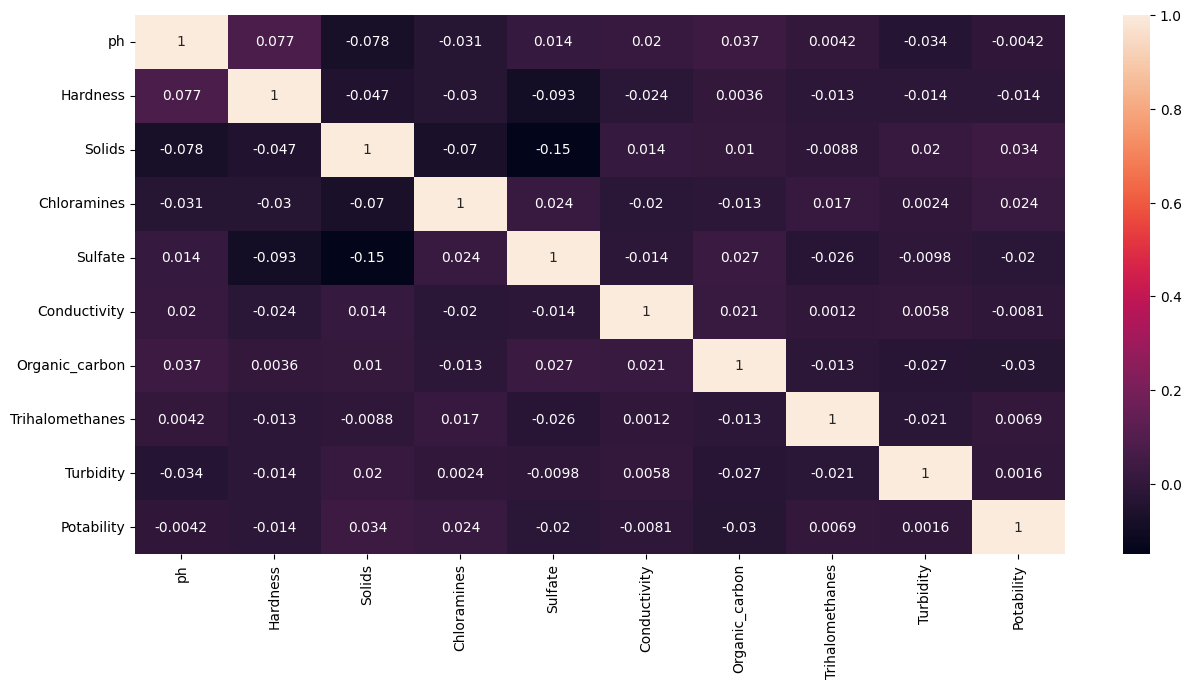

In [ ]:
# heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

## **Observation:**

The heatmap indicates that the features mostly exhibit weak correlations with each other. While weak correlation does not definitively eliminate the possibility of multicollinearity, it suggests that multicollinearity might be less probable in this particular dataset. To thoroughly check for multicollinearity, other methods such as Variance Inflation Factor (VIF) analysis are typically used alongside correlation analysis.

In [ ]:
# function to create labeled barplots of the numerical variables

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

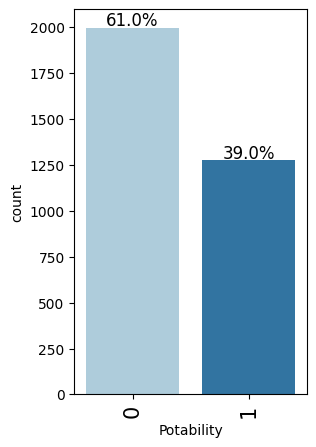

In [ ]:
labeled_barplot(data, "Potability", perc=True)

## **Observation:**

* More than half of the water samples are classified as not potable

## **Dealing with outliers in the data**

In [ ]:
# ploting a box plot for data frame with all numerical columns to check for potential outliers
def plot_box(data):
    for column in data.columns:
        if data[column].dtype != object:
            plt.figure(figsize=(10, 5))
            sns.boxplot(data[column])
            plt.title(f'Boxplot of {column}')
            plt.show()

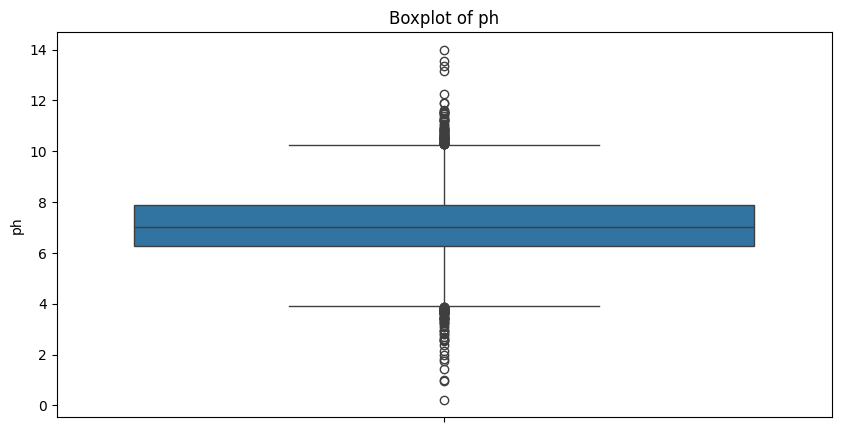

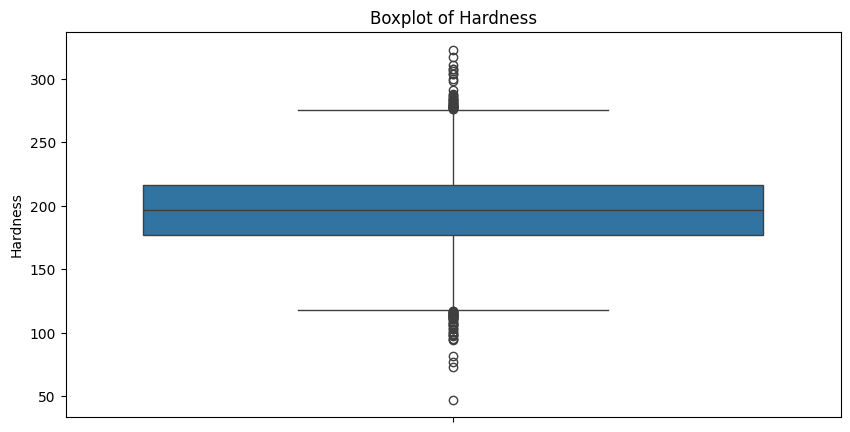

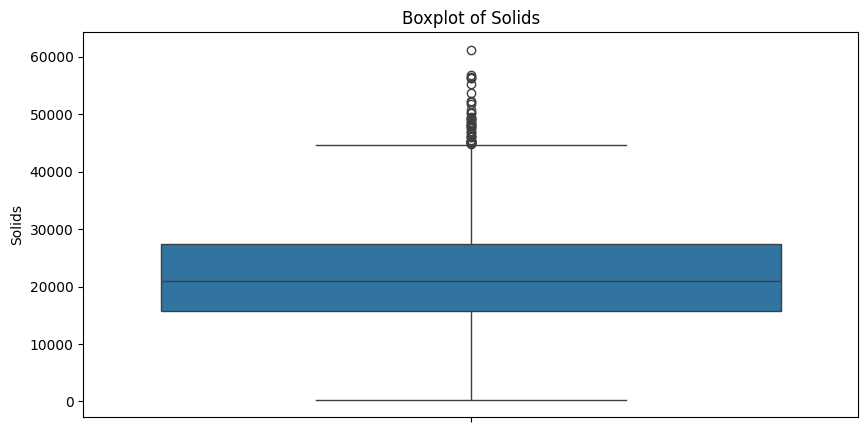

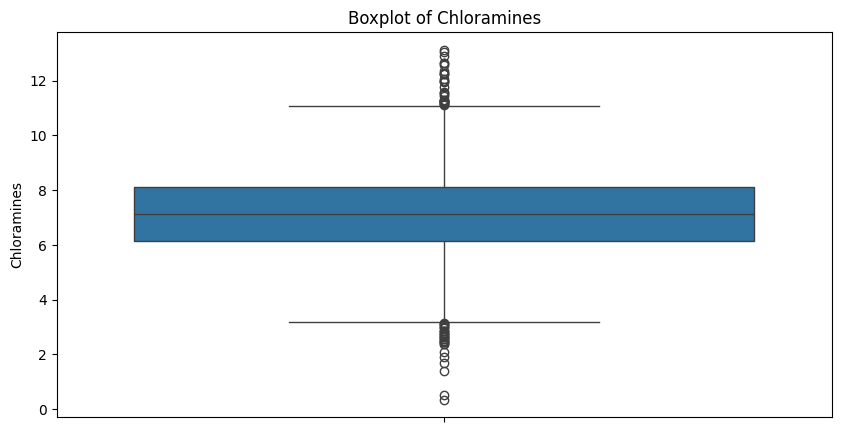

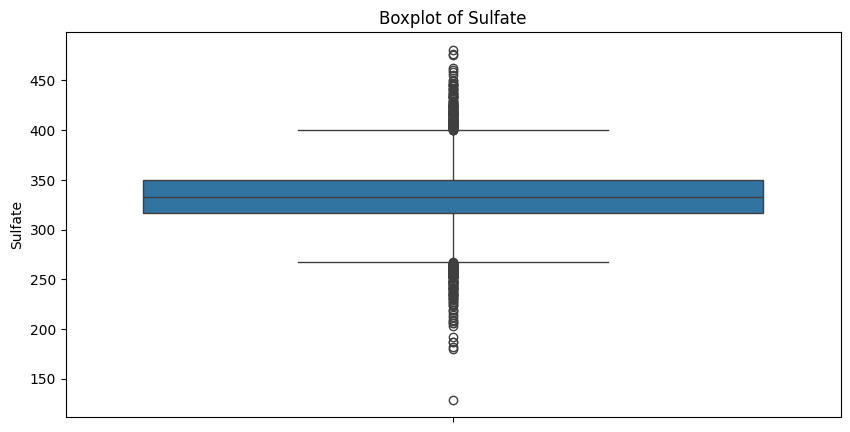

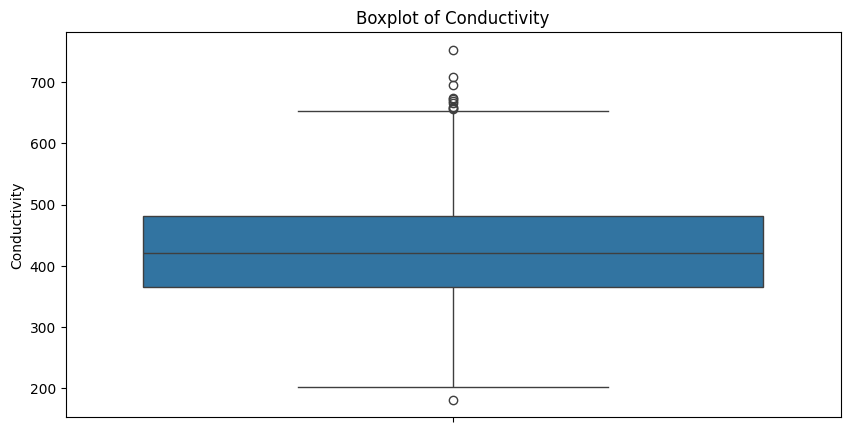

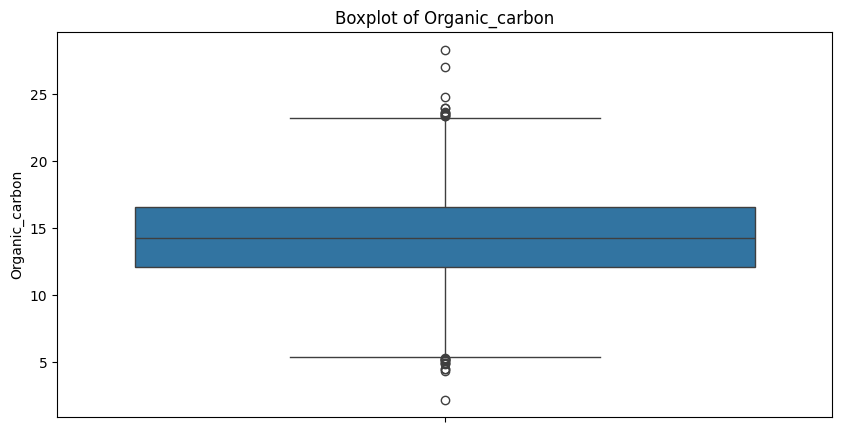

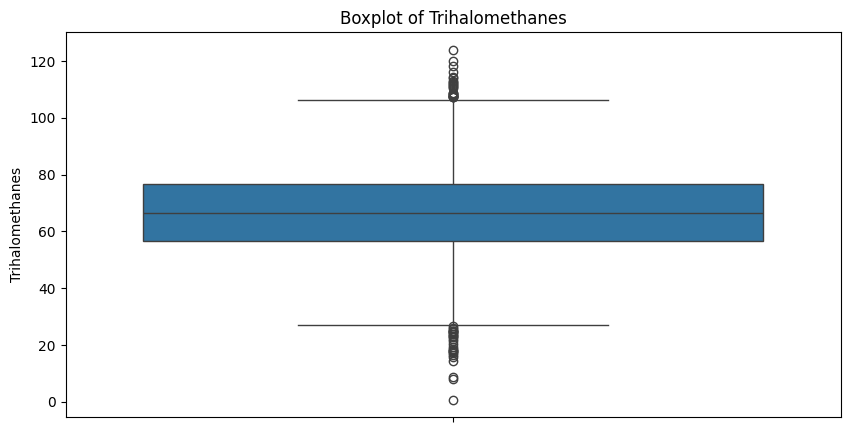

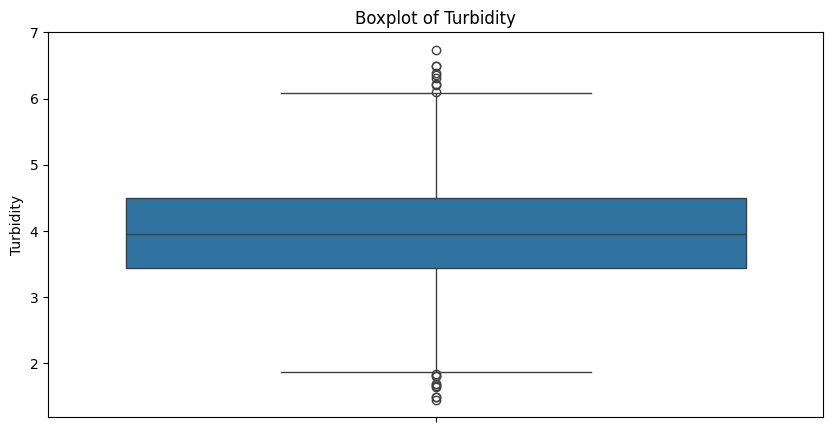

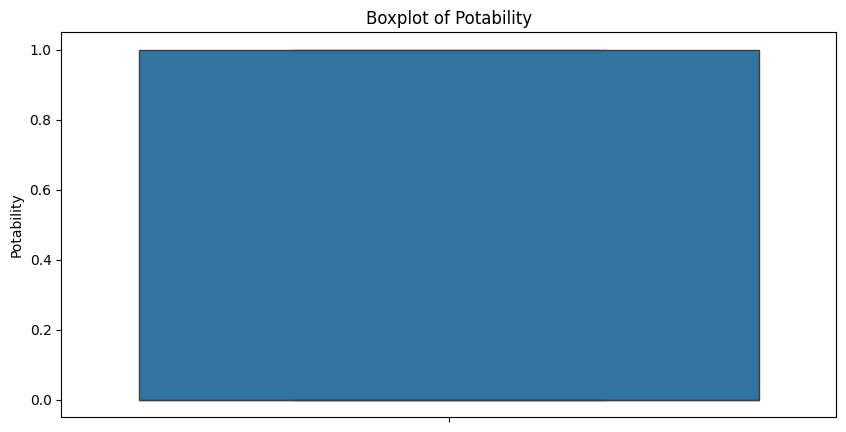

In [ ]:
plot_box(data)

In [ ]:
# Determining the percentage outlier data points
def find_outliers(data):
    for column in data.columns:
        if data[column].dtype != object:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
            percentage = (outliers / data[column].shape[0]) * 100
            print(f"Column {column} has {round(percentage, 2)}% outliers")
            print("-" * 50)

In [ ]:
find_outliers(data)

Column ph has 4.3% outliers
--------------------------------------------------
Column Hardness has 2.53% outliers
--------------------------------------------------
Column Solids has 1.43% outliers
--------------------------------------------------
Column Chloramines has 1.86% outliers
--------------------------------------------------
Column Sulfate has 8.06% outliers
--------------------------------------------------
Column Conductivity has 0.34% outliers
--------------------------------------------------
Column Organic_carbon has 0.76% outliers
--------------------------------------------------
Column Trihalomethanes has 1.65% outliers
--------------------------------------------------
Column Turbidity has 0.58% outliers
--------------------------------------------------
Column Potability has 0.0% outliers
--------------------------------------------------


## **Observation:**

* It is evident that all the features exhibit some degree of outliers, and given that these may significantly influence water potability, I will opt not to remove them at this stage.
* The 'Potability' column in this dataset, which we aim to predict, consists of values 0 and 1, signifying whether the water is unfit (0) or safe (1) for drinking.
* The distribution of 0's and 1's in the dataset is imbalanced, which should be considered when determining the type of splitting method to employ.

## **Building the model**

I will be building 4 different machine laerning classification models to predtcit the potability of the water samples:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**
- **XGBOOST**
- **Naive Bayes Algorithm**

In [ ]:
# Creating metric function to output the classification and comfusion metric reports

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Unfit', 'Potable'], yticklabels=['Unfit', 'Potable'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# **Splitting the dataset:**


* I will split the data using an 80:20 ratio, allocating 80% for training and the remaining 20% for testing to evaluate the model's performance on unseen data.

* Given the noticeable imbalance between the 0s and 1s in the dependent variable (potability), it's crucial to employ a suitable splitting method to guarantee that both the training and testing datasets are proportionately balanced in accordance with the splitting ratio.

* **Stratified Split:** This approach ensures that the proportion of each class in the original dataset is preserved in both the training and testing sets. For example, if your dataset contains 80% class 0 and 20% class 1, a stratified split will maintain these proportions in your training and testing subsets.

In [ ]:
# Splitting the data into independent and dependent
X = data.drop('Potability', axis=1)  # independent variables
y = data['Potability']               # dependent variable (target)

# Startified splitting of the data
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Stratified split of the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Optional: Apply a sampling technique (e.g., SMOTE) to balance the training set
#smote = SMOTE(random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## **Fitting a logistic regression**

In [ ]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1398
           1       1.00      0.00      0.00       895

    accuracy                           0.61      2293
   macro avg       0.81      0.50      0.38      2293
weighted avg       0.76      0.61      0.46      2293



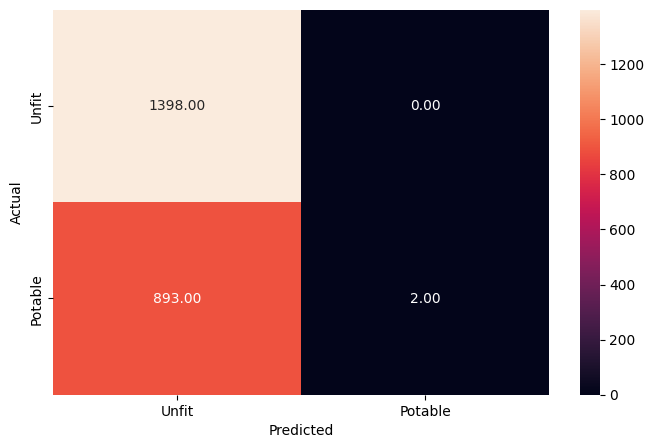

In [ ]:
# Checking the performance on the training data

y_pred_train = lg.predict(X_train_balanced)

metrics_score(y_train_balanced, y_pred_train)

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): The model correctly identifies non-potable water as not safe for drinking.

* False Positive (Actual=0, Predicted=1): The model incorrectly labels non-potable water as safe for consumption.

* False Negative (Actual=1, Predicted=0): The model incorrectly identifies potable water as unsafe for drinking.

* True Positive (Actual=1, Predicted=1): The model accurately predicts water as safe for consumption, and it truly is.

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



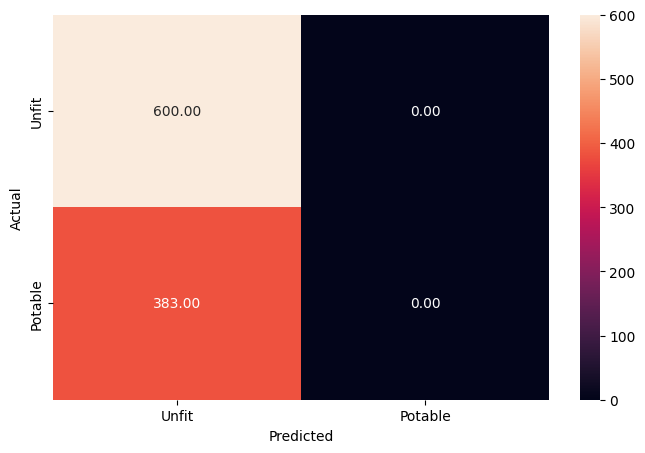

In [ ]:
# Checking the performance on the test dataset

y_pred_test = lg.predict(X_test)

metrics_score(y_test, y_pred_test)

## **Observations:**

- **We are getting an accuracy of around 61%** on train and test dataset.
- However, **the precision is 100% while the recall for this model is 0% on the test and train dataset.**
- As the recall is low, **this model will not perform well** in differentiating out those samples that are potable and requires model tuning.


**Let's check the coefficients and find which variables are the most important in derterming the potability of the water**:

In [ ]:
# Printing the coefficients of logistic regression

cols=X_train_balanced.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Solids,0.00001
Chloramines,-0.00000
Turbidity,-0.00001
ph,-0.00001
Trihalomethanes,-0.00004
Organic_carbon,-0.00010
Conductivity,-0.00015
Hardness,-0.00081
Sulfate,-0.00124


### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

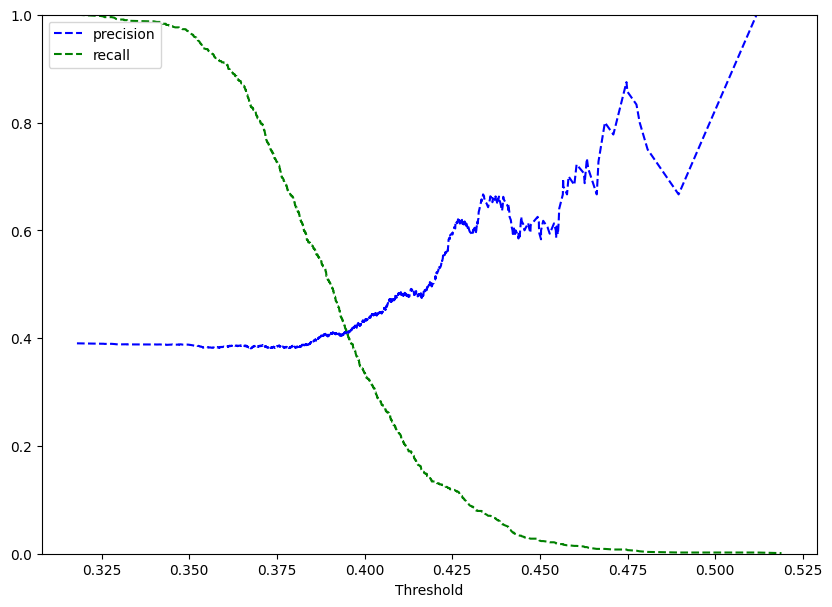

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class

y_scores_lg=lg.predict_proba(X_train_balanced)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train_balanced, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.3949615390139336


**Let's find out the performance of the model at this threshold**


              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1398
           1       0.43      0.34      0.38       895

    accuracy                           0.57      2293
   macro avg       0.53      0.53      0.52      2293
weighted avg       0.55      0.57      0.56      2293



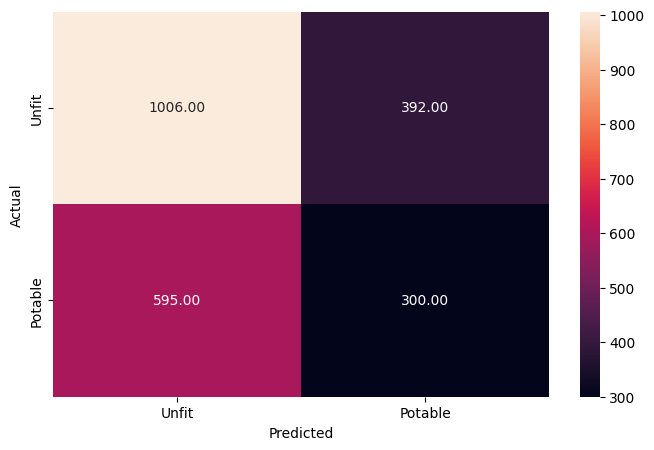

In [ ]:
optimal_threshold=.4
y_pred_train = lg.predict_proba(X_train_balanced)
metrics_score(y_train_balanced, y_pred_train[:,1]>optimal_threshold)

**Let's check the performance on the test data.**

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       600
           1       0.44      0.36      0.39       383

    accuracy                           0.57       983
   macro avg       0.54      0.53      0.53       983
weighted avg       0.56      0.57      0.56       983



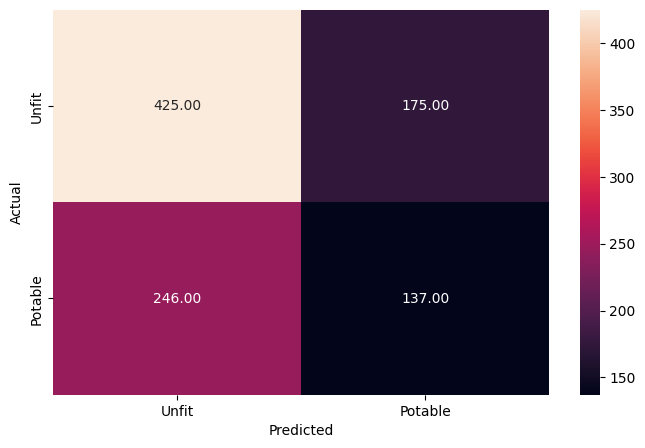

In [ ]:
optimal_threshold1=.4
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation:**
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall (36%) and precision (44%) for the model are not good
- A precision of 0.44 means that when the model predicts water is potable, it is correct only 44% of the time. This indicates that over half of the water samples predicted to be safe (potable) are actually not, which could lead to significant health risks.
- A recall of 0.36 means that the model successfully identifies 36% of the truly potable water samples. This is quite low and indicates that the model is not doing so well at catching most of the potable water samples.

### **Support Vector Machines**

In [ ]:
# To Speed-Up SVM training.
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_balanced)
X_train_scaled = scaling.transform(X_train_balanced)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

## **Linear Kernel**

In [ ]:
# Fitting SVM
svm = SVC(kernel = 'linear') # Linear kernel or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train_balanced)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1398
           1       0.00      0.00      0.00       895

    accuracy                           0.61      2293
   macro avg       0.30      0.50      0.38      2293
weighted avg       0.37      0.61      0.46      2293



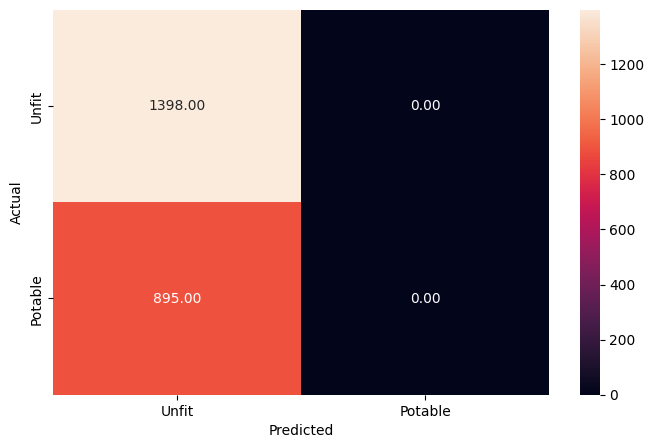

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train_balanced, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



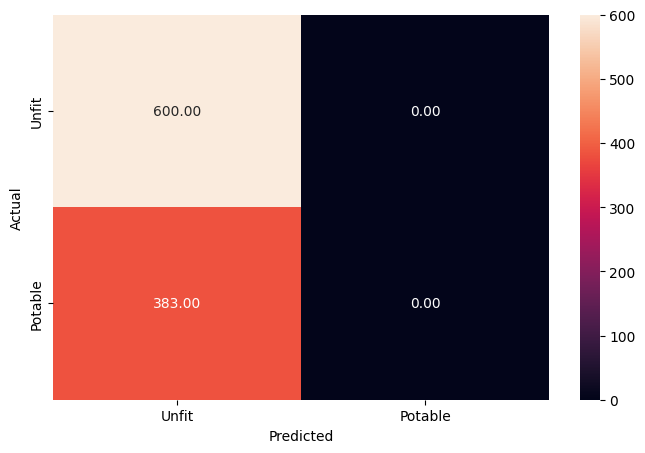

In [ ]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

**Observation:**
- The model is is not performing well

## **RB Kernel**


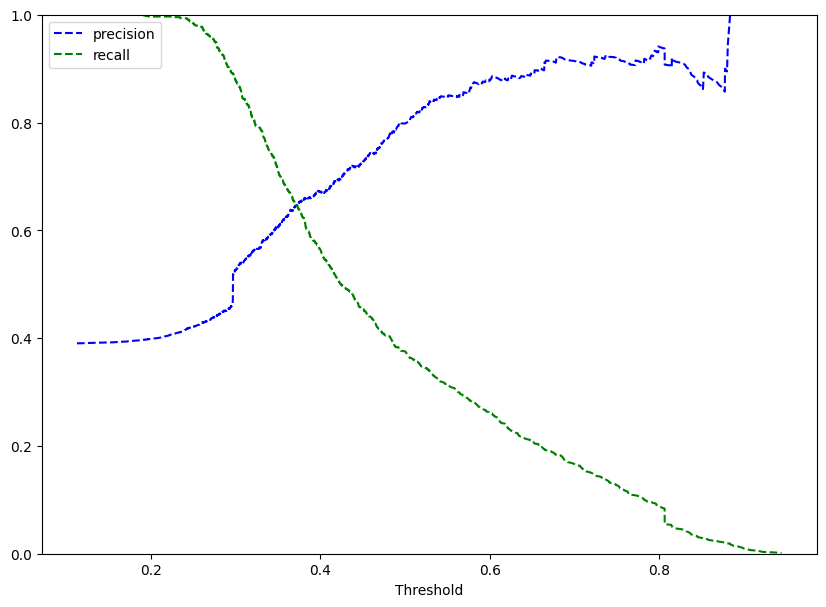

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train_balanced)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_balanced, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.3721748884685254


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1398
           1       0.65      0.65      0.65       895

    accuracy                           0.72      2293
   macro avg       0.71      0.71      0.71      2293
weighted avg       0.72      0.72      0.72      2293



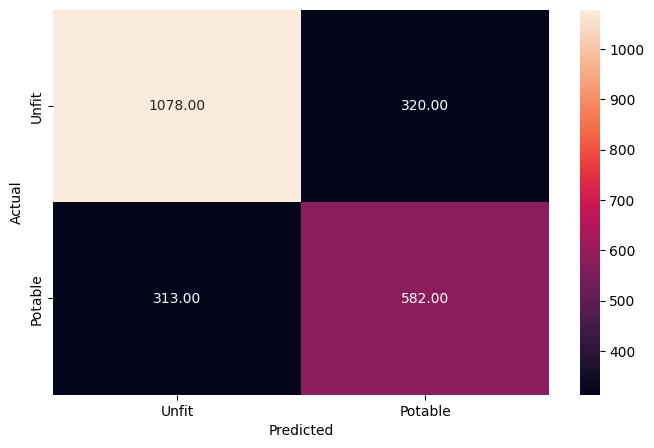

In [ ]:
optimal_threshold1=0.37
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train_balanced, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       600
           1       0.56      0.64      0.60       383

    accuracy                           0.66       983
   macro avg       0.65      0.66      0.65       983
weighted avg       0.67      0.66      0.67       983



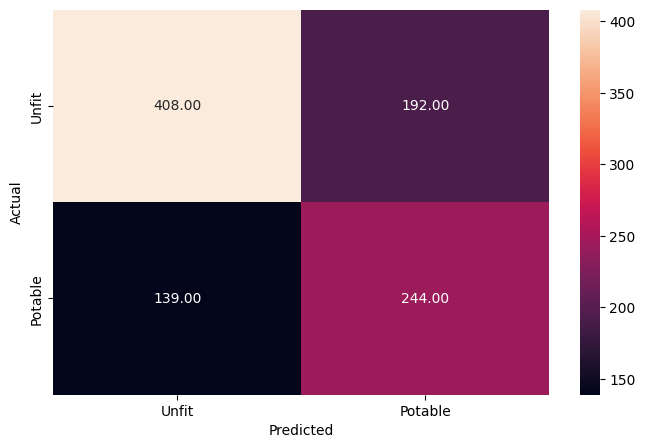

In [ ]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation:**
- The model is giving a similar performance on the test and train data i.e. the model is giving a generalized performance.
- The average recall (64%) and precision (56%) for the model are relatively good.
- Moreover, the kernel used is rbf, so the model performs well with a non-linear kernel.
- A precision of 0.56 means that when the model predicts water is potable, it is correct only 56% of the time. This indicates that almost half of the water samples predicted to be safe (potable) are actually not, which could lead to significant health risks.
- A recall of 0.64 means that the model successfully identifies 64% of the truly potable water samples. This is relativel high and indicates that the model is good at catching most of the potable water samples.

### **Decision Tree**

In [ ]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=8, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1398
           1       0.76      0.40      0.52       895

    accuracy                           0.72      2293
   macro avg       0.73      0.66      0.66      2293
weighted avg       0.73      0.72      0.69      2293



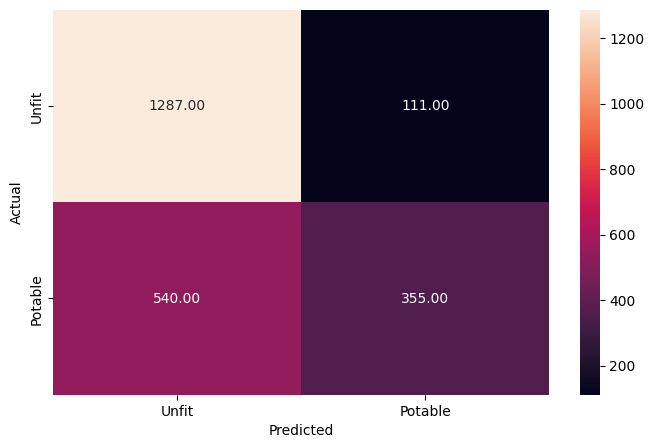

In [ ]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train_balanced)

metrics_score(y_train_balanced, pred_train_dt)

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       600
           1       0.59      0.32      0.41       383

    accuracy                           0.65       983
   macro avg       0.63      0.59      0.58       983
weighted avg       0.64      0.65      0.62       983



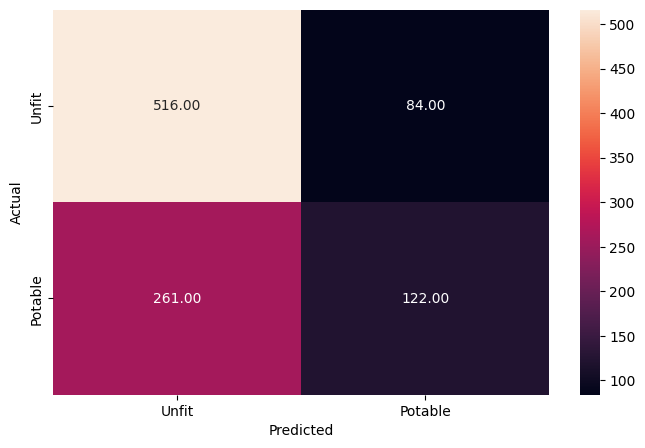

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation:**
- The model exhibits varying performance on the training and testing datasets, showing higher recall and precision on the training data, which suggests overfitting.

**Let's visualize the decision tree** and observe the decision rules:

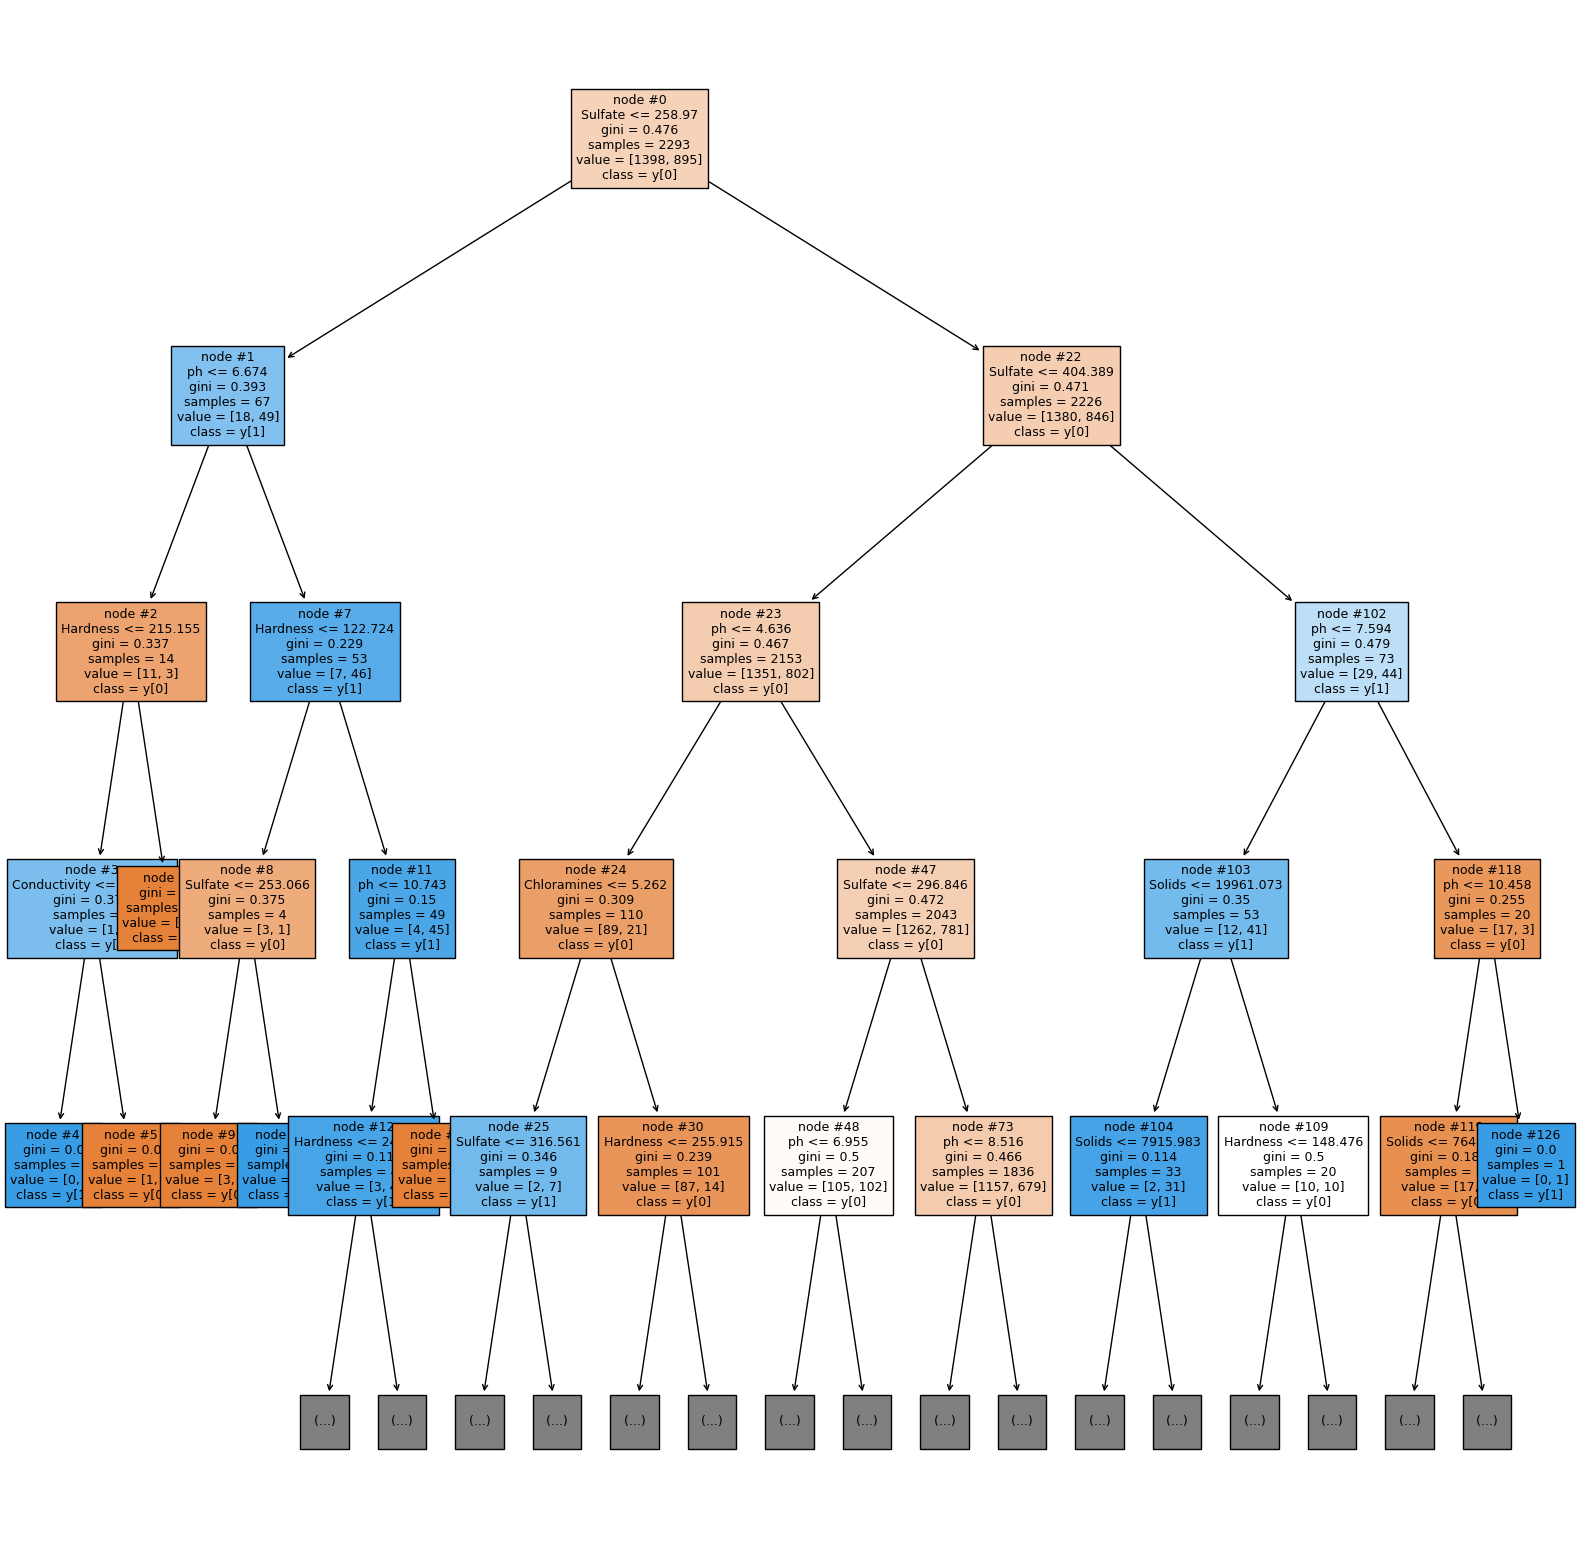

In [ ]:
features = list(X_train_balanced.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

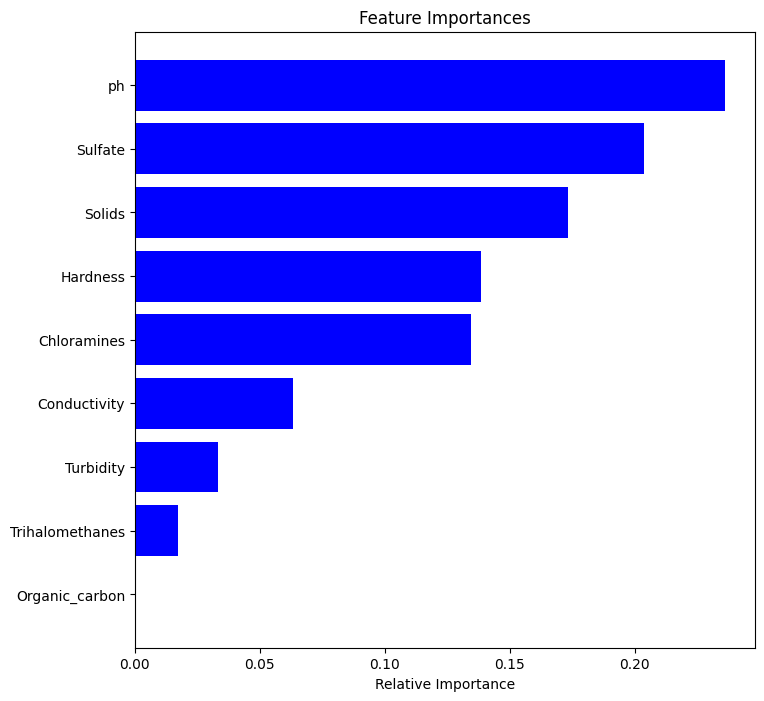

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train_balanced.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**
- ph is the most important feature, followed by Sulfate, Solides,Hardness, and Chloramines** which makes sense.
- Conductivity, Trihalomethanes and organic_carbon show less importance in determining the potability of the water.

## **Decision tree Model tuning**

In [ ]:
# libraries to deploy the ML model
import os
import joblib
import gradio as gr

# choosing the type of ML Model
model_tuned_dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# defining the grid of parameters of the ML Model to choose from
parameters = {
    "max_depth": [3],
    "max_leaf_nodes": [150, 250],
    "min_samples_split": [10, 30],
}

# running the model tuning algorithm
grid_obj = GridSearchCV(model_tuned_dt, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_balanced, y_train_balanced)

In [ ]:
# selecting the best combination of parameters for the model to create a new model
tuned_model_dt = grid_obj.best_estimator_

# training the new ML Model
tuned_model_dt.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=150,
                       min_samples_split=30, random_state=1)

              precision    recall  f1-score   support

           0       0.74      0.24      0.36      1398
           1       0.42      0.87      0.57       895

    accuracy                           0.48      2293
   macro avg       0.58      0.55      0.46      2293
weighted avg       0.62      0.48      0.44      2293



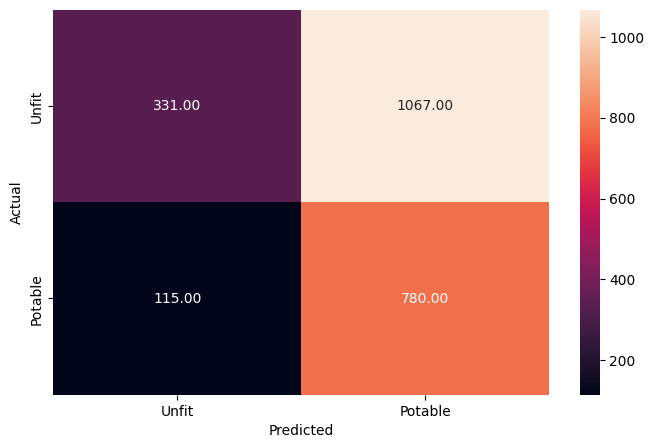

In [ ]:
# Checking performance on the training dataset

pred_train_dt_tuned = tuned_model_dt.predict(X_train_balanced)

metrics_score(y_train_balanced, pred_train_dt_tuned)

              precision    recall  f1-score   support

           0       0.65      0.21      0.32       600
           1       0.40      0.83      0.54       383

    accuracy                           0.45       983
   macro avg       0.53      0.52      0.43       983
weighted avg       0.55      0.45      0.40       983



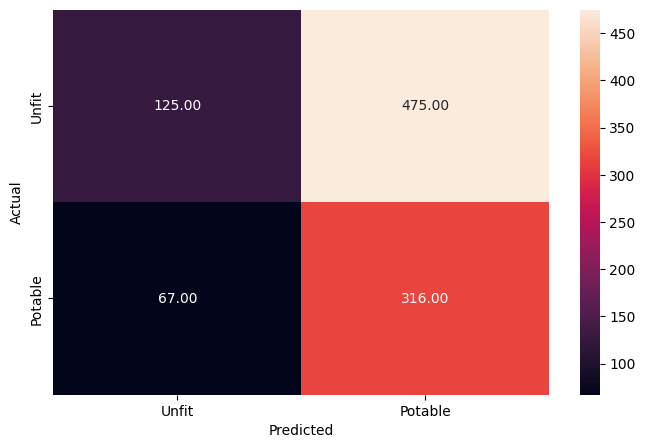

In [ ]:
pred_test_dt_tuned = tuned_model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt_tuned)

**Observation:**
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- A precision of 0.40 means that when the model predicts water is potable, it is correct only 40% of the time. This indicates that over half of the water samples predicted to be safe (potable) are actually not, which could lead to significant health risks.
- A recall of 0.86 means that the model successfully identifies 86% of the truly potable water samples. This is quite high and indicates that the model is at catching most of the potable water samples.

### **Random Forest**

In [ ]:
# Fitting the Random Forest classifier on the training data

# Initialize the Random Forest classifier with class_weight='balanced'
rf_estimator = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_estimator.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00       895

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



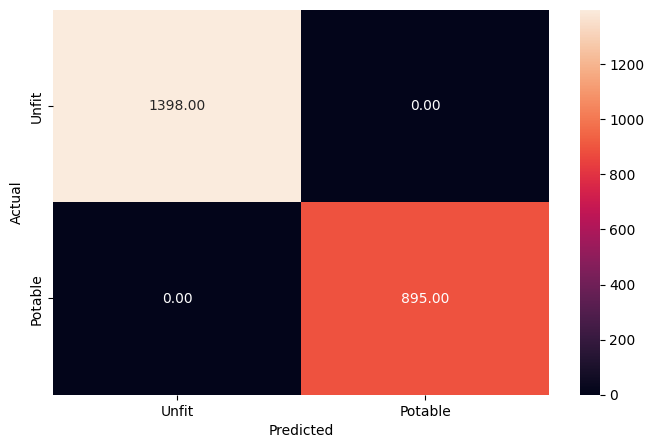

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train_balanced)

metrics_score(y_train_balanced, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% indicating overfitting.

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       600
           1       0.66      0.30      0.41       383

    accuracy                           0.67       983
   macro avg       0.67      0.60      0.59       983
weighted avg       0.67      0.67      0.63       983



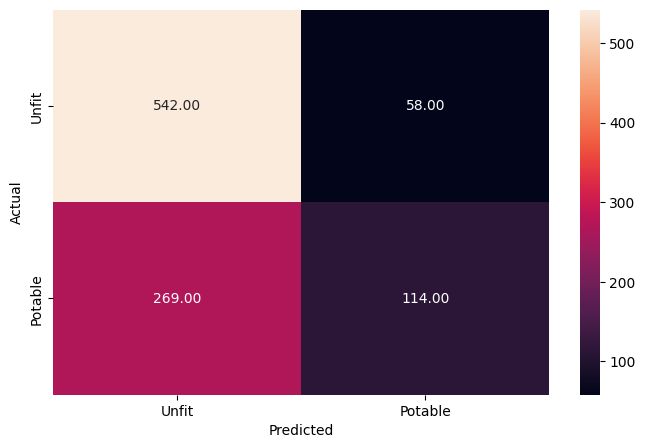

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## **Random Forest model tuning**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_balanced, y_train_balanced)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.90      0.26      0.41      1398
           1       0.45      0.96      0.61       895

    accuracy                           0.53      2293
   macro avg       0.68      0.61      0.51      2293
weighted avg       0.73      0.53      0.49      2293



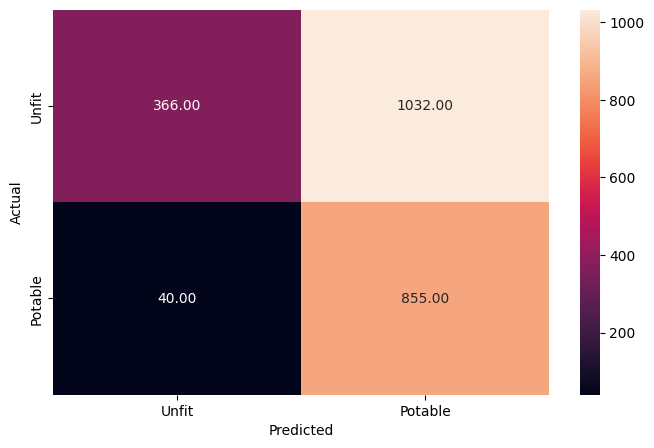

In [ ]:
# Checking performance on the training data
y_pred_train_rf_1 = rf_estimator_tuned.predict(X_train_balanced)

metrics_score(y_train_balanced, y_pred_train_rf_1)

              precision    recall  f1-score   support

           0       0.78      0.22      0.34       600
           1       0.43      0.90      0.58       383

    accuracy                           0.49       983
   macro avg       0.60      0.56      0.46       983
weighted avg       0.64      0.49      0.43       983



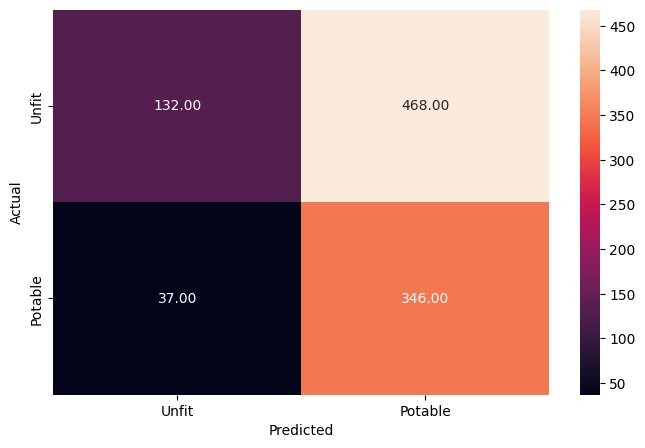

In [ ]:
# Checking performance on the testing data
y_pred_test_rf_1 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_1)

**Observation:**
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- A precision of 0.43 means that when the model predicts water is potable, it is correct only 43% of the time. This indicates that over half of the water samples predicted to be safe (potable) are actually not, which could lead to significant health risks.
- A recall of 0.90 means that the model successfully identifies 90% of the truly potable water samples. This is quite high and indicates that the model is at catching most of the potable water samples.

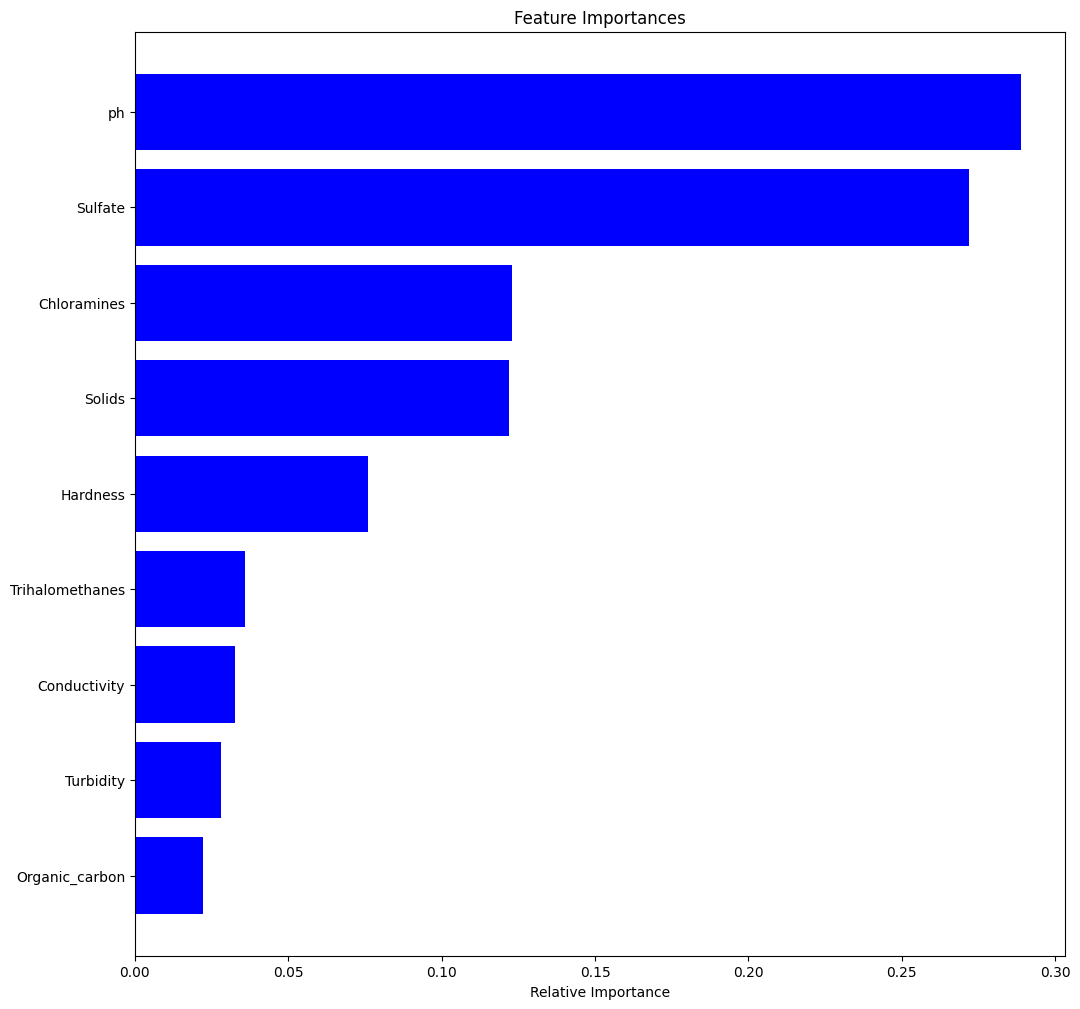

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X_train_balanced.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## **Naive Bayes Algorithm**

In [ ]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb_estimator = GaussianNB()
nb_estimator.fit(X_train_balanced, y_train_balanced)

GaussianNB()

              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1398
           1       0.56      0.22      0.31       895

    accuracy                           0.63      2293
   macro avg       0.60      0.55      0.53      2293
weighted avg       0.61      0.63      0.58      2293



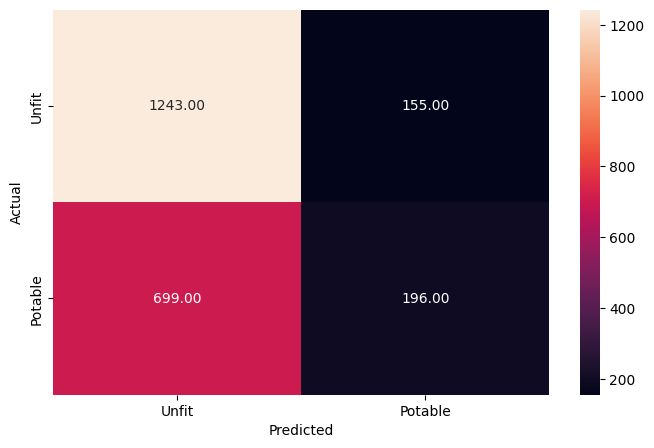

In [ ]:
# Checking performance on the training data
y_pred_train_nb = nb_estimator.predict(X_train_balanced)

metrics_score(y_train_balanced, y_pred_train_nb)

              precision    recall  f1-score   support

           0       0.64      0.88      0.74       600
           1       0.56      0.23      0.33       383

    accuracy                           0.63       983
   macro avg       0.60      0.56      0.53       983
weighted avg       0.61      0.63      0.58       983



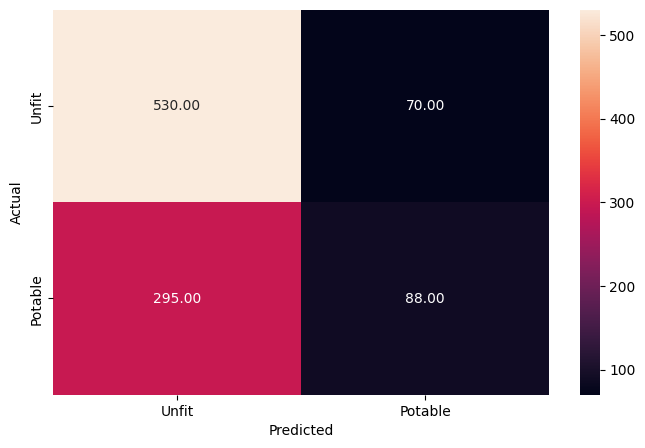

In [ ]:
# Checking performance on the testing data
y_pred_test_nb = nb_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_nb)

**Observation:**
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- The recall of the test data and the train data are significantly low that the model prediction s may containd a lot of false negatives.

## **Model Deployment**

In [ ]:
final_model = svm_rbf

In [ ]:
# exporting the final model to the disk
joblib.dump(final_model, 'hotel_cancellation_prediction_model_v1_0.joblib')

['hotel_cancellation_prediction_model_v1_0.joblib']

In [ ]:
# loading the final model from the disk
cancellation_predictor = joblib.load('hotel_cancellation_prediction_model_v1_0.joblib')

In [ ]:
# define a function that will take the necessary inputs and make predictions

def predict_cancellation(ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity):

    # dictionary of inputs
    input_data = {
        'ph': ph,
        'Hardness': Hardness,
        'Solids': Solids,
        'Chloramines': Chloramines,
        'Sulfate': Sulfate,
        'required_car_parking_space': Conductivity,
        'Organic_carbon': Organic_carbon,
        'Trihalomethanes': Trihalomethanes,
        'Turbidity': Turbidity,
    }

    # create a dataframe using the dictionary of inputs
    data_point = pd.DataFrame([input_data])

    # predicting the output and probability of the output
    prediction = cancellation_predictor.predict(data_point).tolist()
    prediction_prob = np.round(100*cancellation_predictor.predict_proba(data_point)[0][0], 2) if prediction == 1 else np.round(100*cancellation_predictor.predict_proba(data_point)[0][1], 2)

    # returning the final output
    return ("Yes", str(prediction_prob)+"%") if prediction[0] == 1 else ("No", str(prediction_prob)+"%")

In [ ]:
import gradio as gr

# creating the deployment input interface
model_inputs = [
    gr.Number(label="ph"),
    gr.Number(label="Hardness"),  # Update these choices as needed
    gr.Number(label="Solids"),
    gr.Number(label="Chloramines"),
    gr.Number(label="Sulfate"),
    gr.Number(label="Conductivity"),
    gr.Number(label="Organic_carbon"),
    gr.Number(label="Trihalomethanes"),  # Update these choices as needed
    gr.Number(label="Turbidity")  # Update these choices as needed
]

# creating the deployment output interface
model_outputs = [
    gr.Textbox(label="Will the water be potable?"),
    gr.Textbox(label="Chances of potability")
]

# Define a function for the model predictions (replace this with your actual model function)
def predict_water_potability(ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity):
    # This is a placeholder for your model's prediction logic
    return "Yes", "95%"  # Example placeholder response

# Create the Gradio interface
iface = gr.Interface(fn=predict_water_potability, inputs=model_inputs, outputs=model_outputs)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://406ff82667f937c38f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Conclusion**

Machine learning models were applied to forecast water potability using historical data. The SVM model with the RBF kernel emerged as the superior choice due to its higher recall and precision rates. Given our primary concern for water safety, which entails minimizing the incorrect identification of contaminated water as safe, our focus is on enhancing precision to reduce false positives.

Nonetheless, recall cannot be entirely overlooked. Striking a balance is essential, as an overemphasis on precision could render the model overly cautious, leading to the underidentification of genuinely potable water. In the critical realm of water safety, it's crucial to find a middle ground where precision is optimized without significantly compromising recall.

Thus, within this public health framework, it is imperative to refine our model's precision, potentially at the expense of some recall loss. The acceptable level of precision, however, should align with established regulatory standards, the specific demands of the application, and the risk mitigation strategies of involved stakeholders.